# IMDB Movie Analysis

## <u>Project Setup and Data Loading</u>

In [64]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Import the dataset and find its shape
df = pd.read_csv("imdb_movies.csv")
df.shape

(10178, 12)

In [65]:
# Display the top 5 rows of datasets
df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


## <u>Data Overview and Basic Exploration</u>

In [66]:
# Display the summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


In [67]:
# Display the descriptive statistics
df.describe()

,score,budget_x,revenue
count,10178.000000,1.017800e+04,1.017800e+04
mean,63.497052,6.488238e+07,2.531401e+08
std,13.537012,5.707565e+07,2.777880e+08
min,0.000000,1.000000e+00,0.000000e+00
25%,59.000000,1.500000e+07,2.858898e+07
50%,65.000000,5.000000e+07,1.529349e+08
75%,71.000000,1.050000e+08,4.178021e+08
max,100.000000,4.600000e+08,2.923706e+09


## <u>Data Cleaning</u>

In [68]:
# Convert the date_x column from object to datetime
df['date_x'] = pd.to_datetime(df['date_x'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   names       10178 non-null  object        
 1   date_x      10178 non-null  datetime64[ns]
 2   score       10178 non-null  float64       
 3   genre       10093 non-null  object        
 4   overview    10178 non-null  object        
 5   crew        10122 non-null  object        
 6   orig_title  10178 non-null  object        
 7   status      10178 non-null  object        
 8   orig_lang   10178 non-null  object        
 9   budget_x    10178 non-null  float64       
 10  revenue     10178 non-null  float64       
 11  country     10178 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 954.3+ KB


In [69]:
# Count of total null values in the dataset
df.isnull().sum()

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

In [70]:
# Fill the null values in 'genre' and 'crew' column with 'Unavailable'
df['genre'] = df['genre'].fillna("Unavailable")
df['crew'] = df['crew'].fillna("Unavailable")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   names       10178 non-null  object        
 1   date_x      10178 non-null  datetime64[ns]
 2   score       10178 non-null  float64       
 3   genre       10178 non-null  object        
 4   overview    10178 non-null  object        
 5   crew        10178 non-null  object        
 6   orig_title  10178 non-null  object        
 7   status      10178 non-null  object        
 8   orig_lang   10178 non-null  object        
 9   budget_x    10178 non-null  float64       
 10  revenue     10178 non-null  float64       
 11  country     10178 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 954.3+ KB


In [71]:
# Check for count of total null values again
df.isnull().sum()

names         0
date_x        0
score         0
genre         0
overview      0
crew          0
orig_title    0
status        0
orig_lang     0
budget_x      0
revenue       0
country       0
dtype: int64

## <u>Univariate Analysis:</u>

#### 1. What is the distribution of movie scores? Plot a histogram and describe its shape.

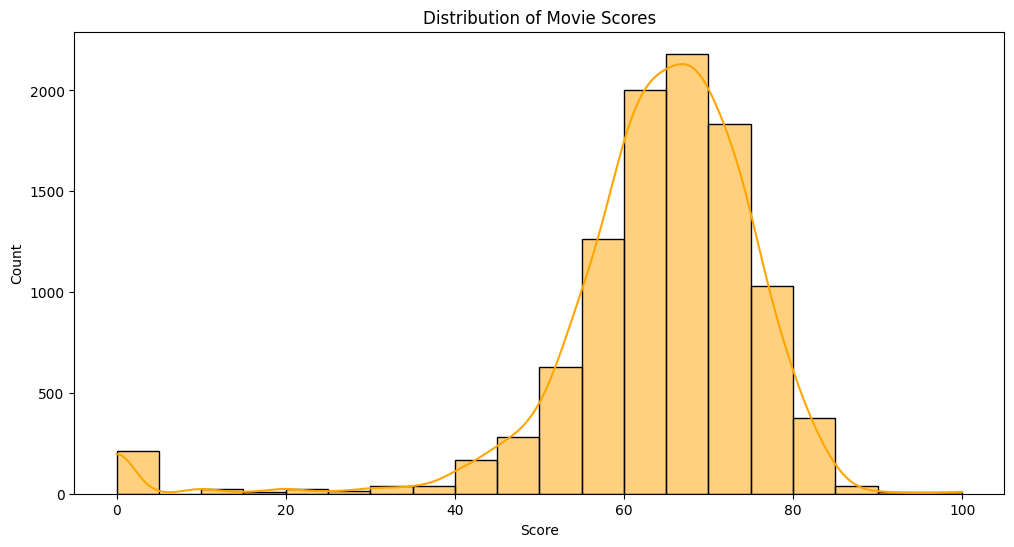

In [72]:
# Plot the distribution of movie scores
plt.figure(figsize = (12, 6))
sns.histplot(df['score'], bins=20, kde=True, color='orange')
plt.title('Distribution of Movie Scores')
plt.xlabel('Score')
plt.savefig('images/Distribution of Movie Scores.jpg')
plt.show()

The histogram is Left-Skewed(Negative Skewness) which means the data has more higher values and fewer lower values, with a few extreme small values.

#### 2. What are the most common genres in the dataset? Use a bar chart to show their distribution.

In [73]:
# Aggregate data of genre with total count of movies
gb = df.groupby('genre').agg({'names':'count'})
gb = gb.sort_values(by = 'names', ascending = False)
gb = gb.head(20)

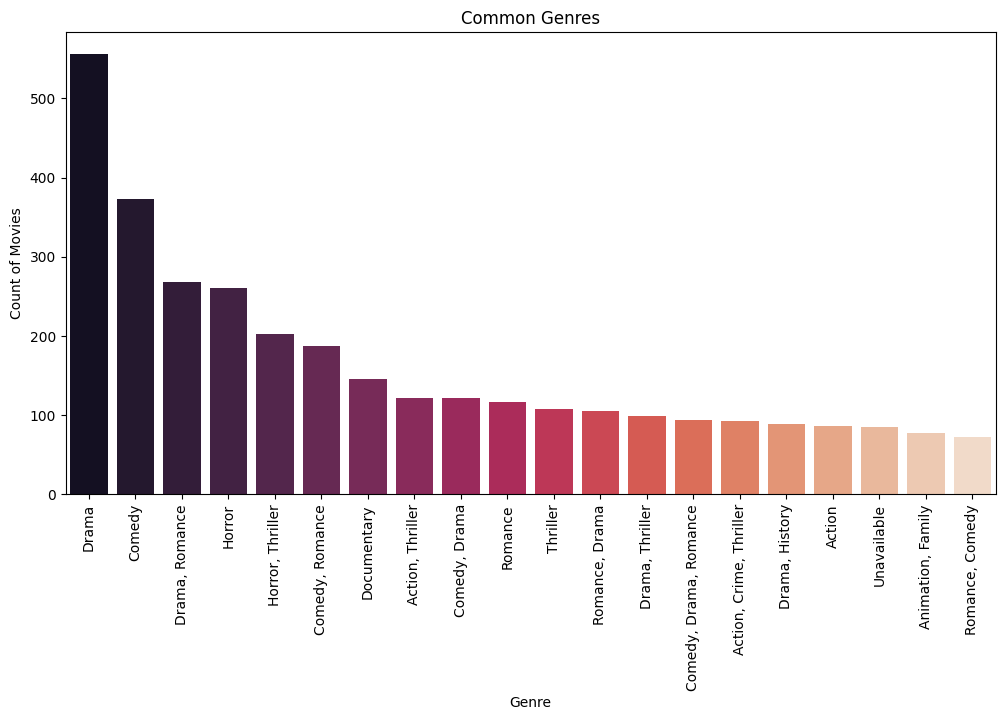

In [74]:
# Plot the distribution of Common Genres
plt.figure(figsize = (12, 6))
sns.barplot(x = gb.index, y = gb['names'], data = gb, hue = gb.index, palette = 'rocket')
plt.ylabel('Count of Movies')
plt.xlabel('Genre')
plt.title('Common Genres')
plt.xticks(rotation = 90)
plt.savefig('images/Common Genres.jpg')
plt.show()

## <u>Bivariate Analysis:</u>

#### 1. Is there a relationship between a movie’s budget and its revenue? Plot a scatter plot and describe any observed trend.

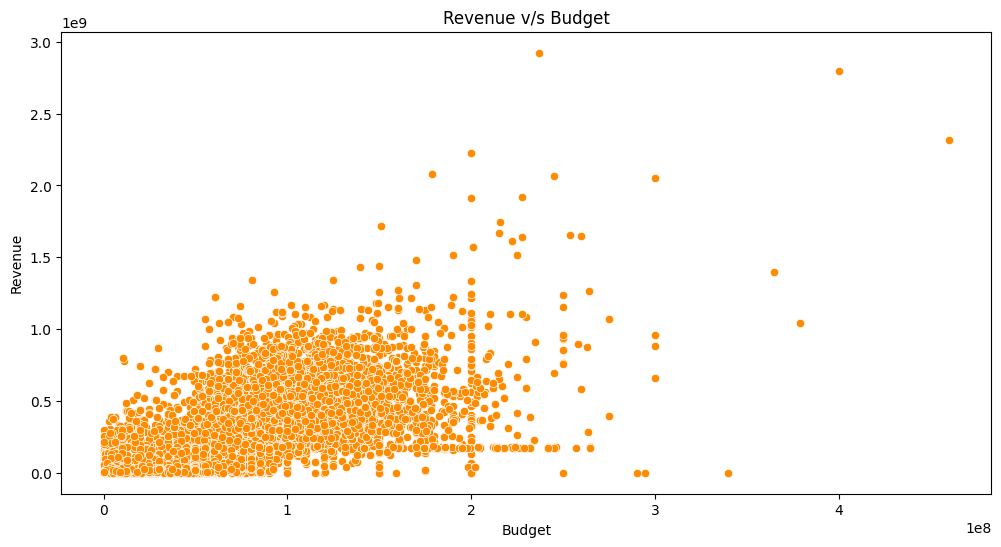

In [75]:
# Plot the relationship between a movie’s budget and its revenue
plt.figure(figsize = (12, 6))
sns.scatterplot(x = 'budget_x', y = 'revenue', data = df, color = 'darkorange')
plt.title('Revenue v/s Budget')
plt.ylabel('Revenue')
plt.xlabel('Budget')
plt.savefig('images/Revenue-Budget.jpg')
plt.show()

#### 2. How do scores vary by country? Use a boxplot to visualize the differences in scores across country.

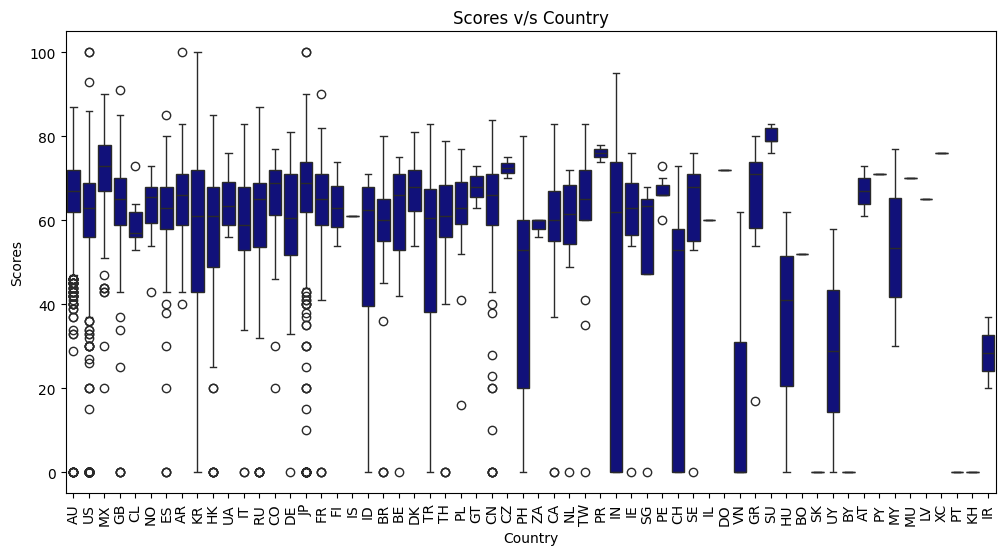

In [76]:
# Plot the difference in scores across countries
plt.figure(figsize = (12,6))
sns.boxplot(x = 'country', y = 'score', data = df, color = 'darkblue')
plt.title('Scores v/s Country')
plt.ylabel('Scores')
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.savefig('images/Scores-Country.jpg')
plt.show()

#### 3. Is there a correlation between the score a movie received against its budget and revenue? Create a heatmap and calculate the correlation coefficient. What can you conclude?

In [77]:
# Create a dataframe to store score, budget and revenue and find it's correlation
df1 = df[['score', 'budget_x', 'revenue']]
df1.columns = ['Score','Budget', 'Revenue']
corr = df1.corr()
corr

,Score,Budget,Revenue
Score,1.000000,-0.23547,0.096533
Budget,-0.235470,1.00000,0.673830
Revenue,0.096533,0.67383,1.000000


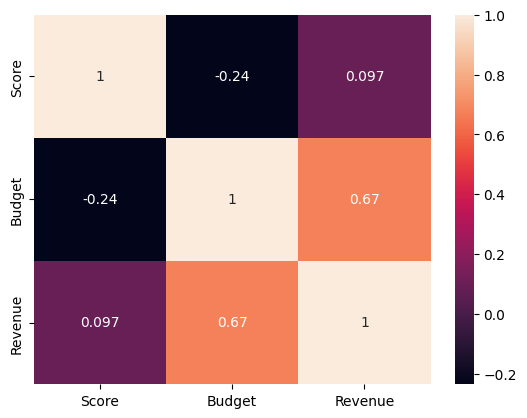

In [78]:
# Plot the heatmap of score, budget and revenue
sns.heatmap(corr, annot = True)
plt.savefig('images/Heatmap.jpg')
plt.show()

## <u>Genre-Specific Analysis:</u>

#### 1. Which genre has the highest average score? Calculate the average score for each genre and plot the results.

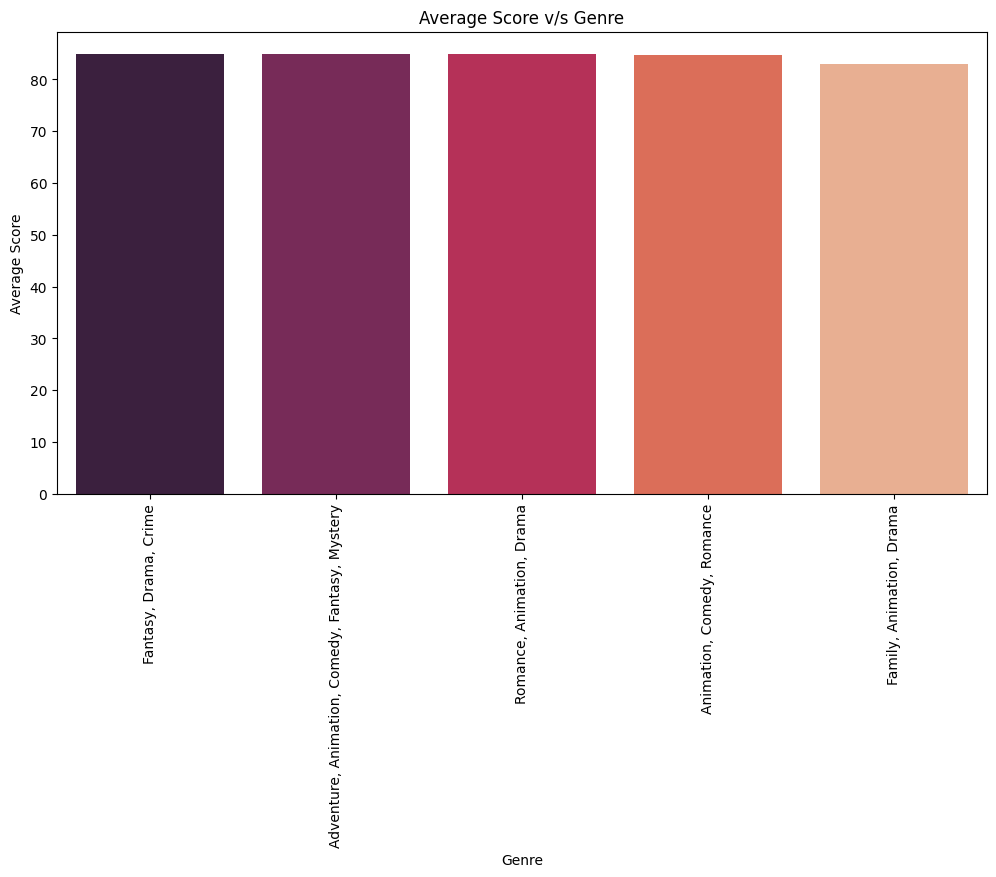

In [79]:
# Plot the graph of average score across genres
gb1 = df.groupby('genre').agg({'score':'mean'})
gb1 = gb1.sort_values(by = 'score', ascending = False)
gb1 = gb1.head(5)
plt.figure(figsize = (12, 6))
sns.barplot(x = gb1.index, y = gb1['score'], data = gb1, hue = gb1.index, palette = 'rocket')
plt.ylabel('Average Score')
plt.xlabel('Genre')
plt.title('Average Score v/s Genre')
plt.xticks(rotation = 90)
plt.savefig('images/Average Score-Genre.jpg')
plt.show()

#### 2. How does the popularity of genres vary over time? Plot the number of movies released per genre each year.

In [80]:
# Extract year from the date_x column
df['year'] = df['date_x'].dt.strftime("%Y")
df['year'] = df['year'].astype(int)

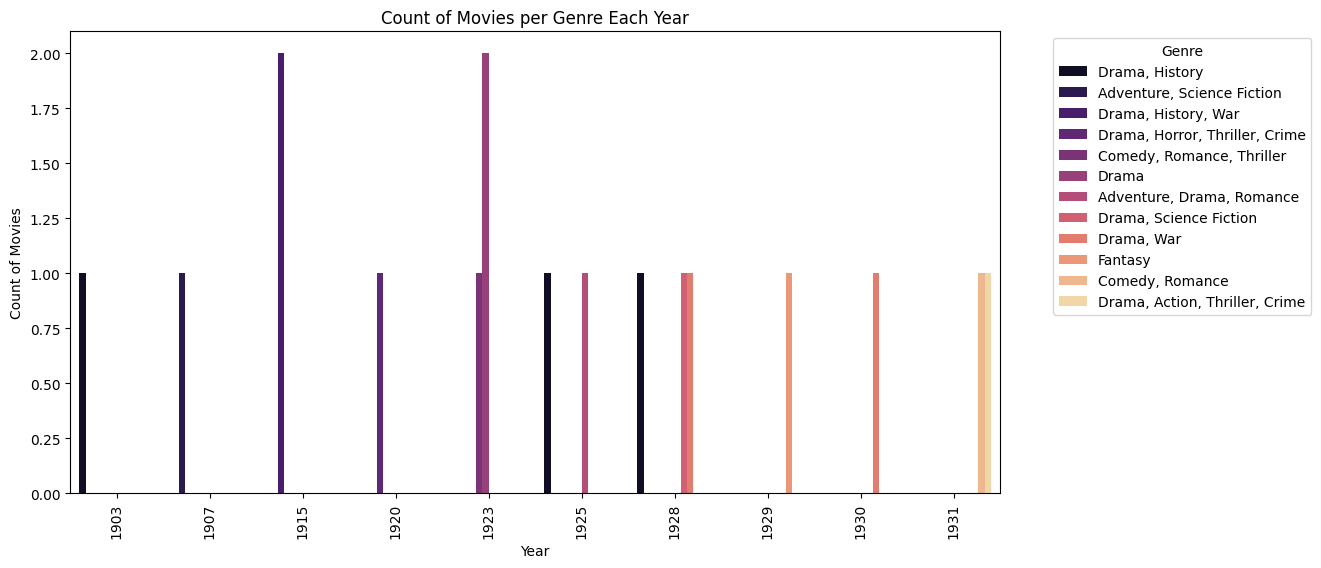

In [81]:
# Group by year and genre and count the number of movies in each group
gb2 = df.groupby(['year', 'genre']).size().reset_index(name='count')
gb2 = gb2.head(15)
# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x = 'year', y = 'count', hue = 'genre', data = gb2, palette = 'magma')
plt.title('Count of Movies per Genre Each Year')
plt.xlabel('Year')
plt.ylabel('Count of Movies')
plt.xticks(rotation = 90)
plt.legend(title = 'Genre', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.savefig('images/Count of Movies per Genre Each Year.jpg')
plt.show()

## <u>Year and Trend Analysis</u>

#### 1. How has the average score changed over the years? Plot the average score for each year.

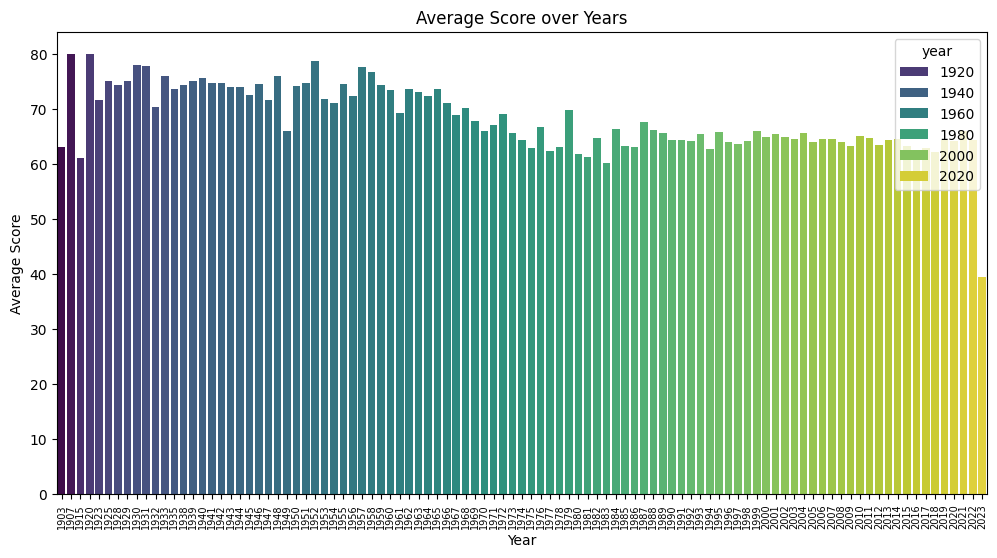

In [82]:
# Plot the average score across years
gb3 = df.groupby('year').agg({'score':'mean'})
plt.figure(figsize = (12, 6))
sns.barplot(x = gb3.index, y = gb3['score'], data = gb3, hue = gb3.index, palette = 'viridis')
plt.ylabel('Average Score')
plt.xlabel('Year')
plt.title('Average Score over Years')
plt.xticks(rotation = 90, fontsize = 7)
plt.savefig('images/Average Score over Years.jpg')
plt.show()

#### 2. Which years had the highest and lowest number of movie releases? Plot the number of movies released each year.

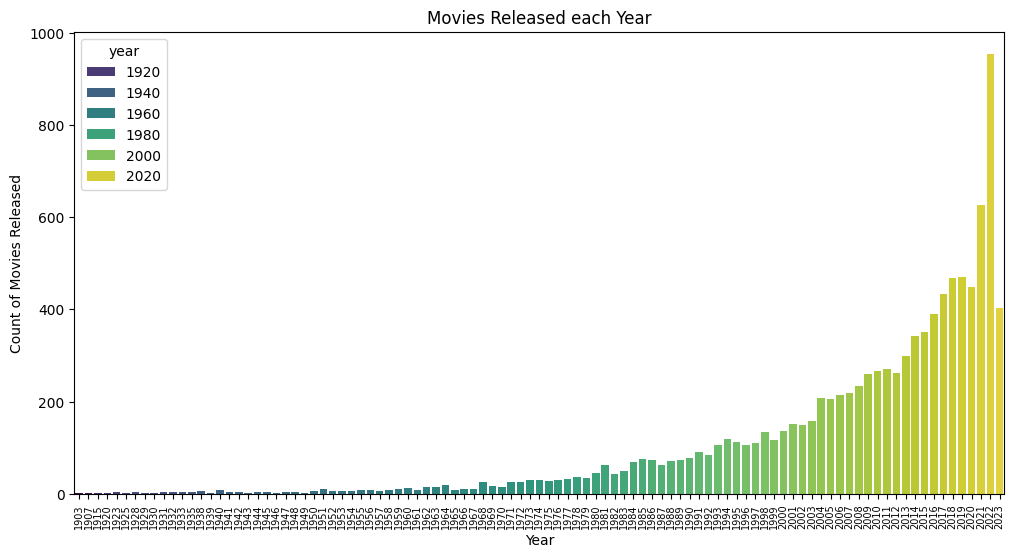

In [83]:
# Plot the number of movies released each year
gb4 = df.groupby('year').agg({'names':'count'})
plt.figure(figsize = (12, 6))
sns.barplot(x = gb4.index, y = gb4['names'], data = gb4, hue = gb4.index, palette = 'viridis')
plt.ylabel('Count of Movies Released')
plt.xlabel('Year')
plt.title('Movies Released each Year')
plt.xticks(rotation = 90, fontsize = 7)
plt.savefig('images/Movies Released each Year.jpg')
plt.show()

In [84]:
# Year with highest movie releases
max_row = gb4.loc[gb4['names'] == gb4['names'].max()]
highest_releases_year = max_row.index[0]
print(highest_releases_year)

2022


In [85]:
# Year with lowest movie releases
min_row = gb4.loc[gb4['names'] == gb4['names'].min()]
lowest_releases_year = min_row.index[0]
print(lowest_releases_year)

1903


#### 3. Plot the number of movies released each decade.

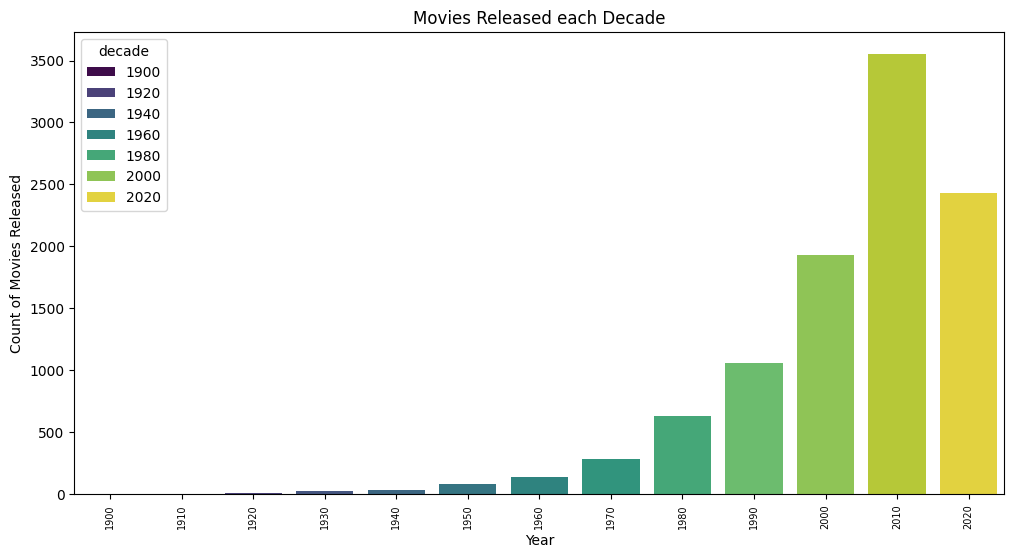

In [88]:
# Calculate decade from the year column
df['decade'] = df['year'] // 10 * 10
# Plot the number of movies released each decade
gb5 = df.groupby('decade').agg({'genre':'count'})
plt.figure(figsize = (12, 6))
sns.barplot(x = gb5.index, y = gb5['genre'], data = gb5, hue = gb5.index, palette = 'viridis')
plt.ylabel('Count of Movies Released')
plt.xlabel('Year')
plt.title('Movies Released each Decade')
plt.xticks(rotation = 90, fontsize = 7)
plt.savefig('images/Movies Released each Decade.jpg')
plt.show()

## Insights and Summary

#### 1. Based on your analysis, what are three major insights you learned about movie trends, popular genres, or movie scores?

<b><u>Genre Popularity Over Time:</u></b>
Certain genres, such as action and adventure, have seen a consistent rise in popularity over the years, likely driven by advancements in special effects and global box office appeal. In contrast, genres like westerns or musicals have experienced a decline, possibly due to changes in audience preferences and cultural trends.

<b><u>Impact of Budget on Movie Scores:</u></b>
High-budget movies often perform better in terms of audience and critic ratings, as they can invest in better visual effects, renowned directors, and top-tier actors. However, there are exceptions, with some low-budget films (e.g., independent dramas or thrillers) achieving critical acclaim due to strong storytelling and innovative filmmaking.

<b><u>Seasonal Release Trends and Scores:</u></b>
Movies released during summer or the holiday season tend to have higher box office earnings and audience ratings. These periods are strategically chosen for blockbuster films that cater to family and mass audiences.

#### 2. What additional questions could be explored with this dataset, or what other data would be helpful to gain a deeper understanding?

1) How does a movie's revenue affect its score? Do more commercially successful movies tend to have better ratings?

2) Is there a significant relationship between high IMDB scores and box office success?

3) Are there differences in scores or revenue between movies produced in different countries?

4) Which genres achieve the highest revenue-to-budget ratio, and what factors contribute to their success?